<style>
div.blue{
    background-color:#e6f0ff; 
    border-radius: 5px; 
    padding: 20px;}
</style> 

<style>
div.warn {    
    background-color: #fcf2f2;
    border-color: #dFb5b4;
    border-left: 5px solid #dfb5b4;
    padding: 0.5em;
    }
 </style>
    
<h1 style="text-align: center; color: purple;" markdown="1">Econ 320 Python: Multicollinearity </h1>
<h2 style="text-align: center; color: purple;" markdown="1">Handout # 7 </h2>

 


#### Package setup

In [55]:
import wooldridge as woo
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Multicolinearity and Histogram of Residuals

It is common that variables are correlated with each other to some extent, for instance age and education might be correlated because in many cases and older pwrson might have more education. Or experience and age.

This phenomenon of correlated independent variables is termed multicollinearity.

But is multicollinearity desirable? Hardly.



 <div style="background-color:Lavender; color:DarkBlue; padding:30px;">
 <b>Consequences of Multicollinearity</b><br><br>
 1. Wider confidence interval<br>
 2. Insignificant $t$-statistic<br>
 3. Though some $t$-statistic might be insignificant, but the $R^2$ can be misleadingly high<br>
 4. Any data change might cause drastic estimation result
 </div>

# VIF 

*Variance inflation factor (VIF)* is a statistic to evaluate imperfect multicolinearity for individual coeficients. It is obtained from the equation of the variance of $\hat{\beta_j}$: 

$$ Var(\hat{\beta_j})= \frac{1}{n-1}\cdot \frac{\hat{\sigma}^2}{Var(x_j)}\cdot\frac{1}{1-R^2_j}$$
 The VIF is the term in the variance that is determined by the correlation between $x_j$ and the other explanatory variables. 
 $$ VIF=\frac{1}{1-R^2_j}$$
 And $R^2_j$ is the $R^2$ of a regression $x_j =$  all the other x's

Therefore we can write 
$$ Var(\hat{\beta_j})= \frac{1}{n-1}\cdot \frac{\hat{\sigma}^2}{Var(x_j)}\cdot VIF_j$$
 and this shows that $VIF_j$ is the factor by which $Var(\hat{\beta_j})$ is higher because $x_j$ is not uncorrelated with the other explanatory variables. 
 

Using Python we can evaluate multicolinearity of multiple regression model, calculating the variance inflation factor (VIF) from the result of lm(). If VIF is more than 10, multicolinearity is strongly suggested. See the code below. 

In [56]:
wage1 = woo.dataWoo("wage1")

lmres = smf.ols(formula = "np.log(wage) ~ educ + exper + tenure", 
                data= wage1).fit()
lmres.summary()
st = Stargazer([lmres])
HTML(st.render_html())

In [57]:
# calculate VIF :

# two [] to be able create a DataFrame
X = wage1[['educ', 'exper', 'tenure']].copy()
X['Intercept'] = 1

vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


# View results using print
print(vif)

   variables        VIF
0       educ   1.112771
1      exper   1.477618
2     tenure   1.349296
3  Intercept  29.378903


In [58]:
          
#Calculate VIF step by step
# First R^2 for educ variable 
reduc = smf.ols('educ ~ exper + tenure', data = wage1).fit().rsquared
# then the vif for educ
vifeduc = 1/(1-reduc)
vifeduc

1.1127707502838833

In [74]:
# Let's create a variable that is perfectly colinear with one of the explanatory variables 
wage1["x"]= 2*wage1["educ"]+3


# Let's run a regression including that and see how Python reacts!!
colols = smf.ols(formula = "np.log(wage) ~ educ + exper + tenure + x", data = wage1).fit()
display(colols.summary())
stt = Stargazer([colols])
HTML(stt.render_html())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     80.39
Date:                  周一, 17 3月 2025   Prob (F-statistic):           9.13e-43
Time:                        00:08:05   Log-Likelihood:                -313.55
No. Observations:                 526   AIC:                             635.1
Df Residuals:                     522   BIC:                             652.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0621      0.040      1.544      0.123      -0.017       0.141
educ          -0.0561      0.050     -1.130      0.259      -0.154       0.041
exper          0.0041      0.002      2.391      0.017       0.001       0.008
tenure         0.0221      0.003      7.133      0.000       0.016       0.028
x              0.0741      0.021      3.473      0.001       0.032       0.116
==============================================================================
Omnibus:                       11.534   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               20.941
Skew:                           0.021   Prob(JB):                     2.84e-05
Kurtosis:                       3.977   Cond. No.                     3.85e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.71e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [60]:
#Now check the line below by uncommenting it. What happens? #vif(lm(log(wage) ~ educ+exper+tenure +x , data=wage1))
XX = wage1[['educ', 'exper', 'tenure', 'x']].copy()
XX['Intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = XX.columns
vif["VIF"] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
print(vif)



   variables       VIF
0       educ       inf
1      exper  1.477618
2     tenure  1.349296
3          x       inf
4  Intercept  0.000000


d:\anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
d:\anaconda\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


# Plotting the residuals

Your residuals of the OLS regression $u~n(0, \hat{\sigma^2})$
The best estimator for $\hat{\sigma}^2=SSR/(n-k-1)$ The result of the ols() command in Python allows you to obtain $\hat{\sigma}$ 

Let's see a histogram of the residuals to show their distribution

In [69]:
# k= 3 regresors 
rmse = np.sqrt(np.sum((lmres.resid)**2)/(len(lmres.resid)-4))
rmse1 = np.sqrt(lmres.mse_resid)
print(rmse)
print(rmse1)

0.44086203292506515
0.44086203292506515


C:\Users\zhaoj\AppData\Local\Temp\ipykernel_12392\1330545595.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, fit=norm);


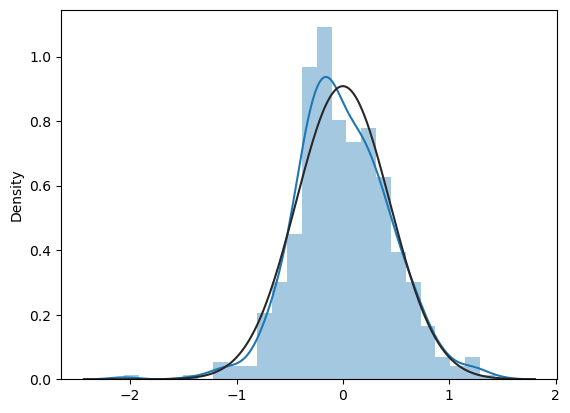

In [71]:
from scipy.stats import norm

x_axis = np.arange(-2, 2, 0.001)
# Mean = 0, SD = 2.


res=pd.DataFrame(lmres.resid)
sns.distplot(res, fit=norm);


#plt.plot(x_axis, norm.pdf(x_axis,0,rmse), color='red')

 <div style="background-color:Lavender; color:DarkBlue; padding:30px;">
 <b>Final Notes on Multicollinearity</b><br><br>
There are other more complicated detection methods and remedies for multicollinearity that we have total omitted such as auxiliary regression with Klein's criterion, a priori model specification and etc. However, remember that multicollinearity doesn't have to be handled even if there are many remedial techniques available, feel free to do nothing about it.
 </div>

In [63]:
!jupyter nbconvert --to html H7E_320Lab_Multicolinearity.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'H7E_320Lab_Multicolinearity.ipynb' matched no files


&nbsp;
<hr />
<p style="font-family:palatino; text-align: center;font-size: 15px">ECON320 Python Programming Laboratory</a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px">Professor <em> Paloma Lopez de mesa Moyano</em></a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px"><span style="color: #6666FF;"><em>paloma.moyano@emory.edu</em></span></p>

<p style="font-family:palatino; text-align: center;font-size: 15px">Department of Economics</a></p>
<p style="font-family:palatino; text-align: center; color: #012169;font-size: 15px">Emory University</a></p>

&nbsp;